In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

path = r'/home/ntsation/repos/blackfriday-eda-prep/src/train.csv'

df = pd.read_csv(path)
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


#### Análise básica do conjunto de dados

- Esse comando cria um resumo estatístico do DataFrame, incluindo estatísticas descritivas para todas as colunas, independentemente do tipo de dado.


In [9]:
desc_stats = df.describe(include='all')
print(desc_stats)

             User_ID Product_ID  Gender     Age     Occupation City_Category  \
count   5.500680e+05     550068  550068  550068  550068.000000        550068   
unique           NaN       3631       2       7            NaN             3   
top              NaN  P00265242       M   26-35            NaN             B   
freq             NaN       1880  414259  219587            NaN        231173   
mean    1.003029e+06        NaN     NaN     NaN       8.076707           NaN   
std     1.727592e+03        NaN     NaN     NaN       6.522660           NaN   
min     1.000001e+06        NaN     NaN     NaN       0.000000           NaN   
25%     1.001516e+06        NaN     NaN     NaN       2.000000           NaN   
50%     1.003077e+06        NaN     NaN     NaN       7.000000           NaN   
75%     1.004478e+06        NaN     NaN     NaN      14.000000           NaN   
max     1.006040e+06        NaN     NaN     NaN      20.000000           NaN   

       Stay_In_Current_City_Years  Mari

#### Verificação de valores ausentes

In [10]:
missing_values = df.isnull().sum
print('Valores Ausentes por Coluna:')
print(missing_values)

Valores Ausentes por Coluna:
<bound method DataFrame.sum of         User_ID  Product_ID  Gender    Age  Occupation  City_Category  \
0         False       False   False  False       False          False   
1         False       False   False  False       False          False   
2         False       False   False  False       False          False   
3         False       False   False  False       False          False   
4         False       False   False  False       False          False   
...         ...         ...     ...    ...         ...            ...   
550063    False       False   False  False       False          False   
550064    False       False   False  False       False          False   
550065    False       False   False  False       False          False   
550066    False       False   False  False       False          False   
550067    False       False   False  False       False          False   

        Stay_In_Current_City_Years  Marital_Status  Product_Cat

#### Verificação de valores exclusivos
- ```df[coluna].unique()``` calcula o número de valores únicos em cada coluna. Cada valor na série corresponde ao número de diferentes valores distintos presentes na respectiva coluna do DataFrame.


In [11]:
print('Valores Únicos por Coluna:')
for coluna in df.columns:
    valores_unicos = df[coluna].unique()
    print(f'Valores únicos na coluna {coluna}:')
    print(valores_unicos)
    print()

Valores Únicos por Coluna:
Valores únicos na coluna User_ID:
[1000001 1000002 1000003 ... 1004113 1005391 1001529]

Valores únicos na coluna Product_ID:
['P00069042' 'P00248942' 'P00087842' ... 'P00370293' 'P00371644'
 'P00370853']

Valores únicos na coluna Gender:
['F' 'M']

Valores únicos na coluna Age:
['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']

Valores únicos na coluna Occupation:
[10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]

Valores únicos na coluna City_Category:
['A' 'C' 'B']

Valores únicos na coluna Stay_In_Current_City_Years:
['2' '4+' '3' '1' '0']

Valores únicos na coluna Marital_Status:
[0 1]

Valores únicos na coluna Product_Category_1:
[ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19]

Valores únicos na coluna Product_Category_2:
[nan  6. 14.  2.  8. 15. 16. 11.  5.  3.  4. 12.  9. 10. 17. 13.  7. 18.]

Valores únicos na coluna Product_Category_3:
[nan 14. 17.  5.  4. 16. 15.  8.  9. 13.  6. 12.  3. 18. 11. 10.]

Valores únicos

#### Distribuição de compras
- ```Valor da Compra```: Refere-se ao montante gasto em uma compra única. Cada transação tem um valor associado que representa o custo dos itens adquiridos ou do serviço utilizado.

- ```Frequência```: Indica quantas vezes um determinado valor de compra ocorreu no conjunto de dados. No caso do histograma, a frequência representa o número de ocorrências de valores de compra em intervalos específicos. Por exemplo, se houver um intervalo de $100 a $200 e a frequência for 20, isso significa que houve 20 compras que variaram entre $100 e $200.

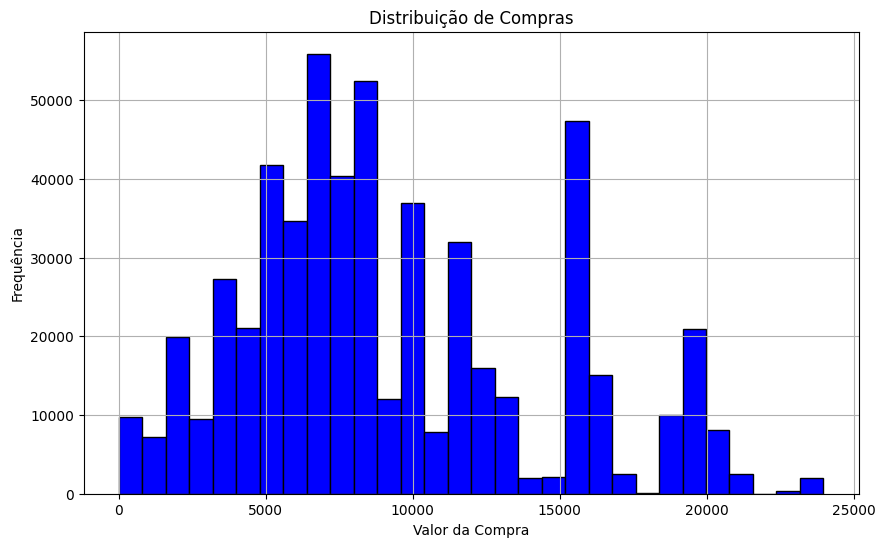

In [12]:
plt.figure(figsize=(10, 6))
plt.hist(df['Purchase'], bins=30,color='blue', edgecolor='black')
plt.title('Distribuição de Compras')
plt.xlabel('Valor da Compra')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

#### Verificação de outliers
- Ao visualizar o boxplot de compras, você pode entender rapidamente a distribuição dos valores de compra, identificando a mediana, a dispersão dos dados (através do comprimento do retângulo), a presença de valores extremos (outliers) e a tendência central dos dados.


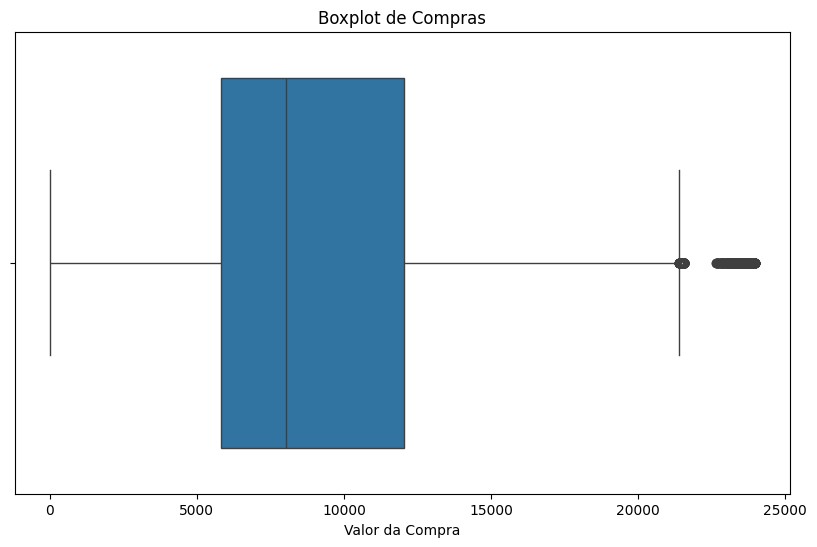

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Purchase'])
plt.title('Boxplot de Compras')
plt.xlabel('Valor da Compra')
plt.show()

#### Operações estatísticas
- Análise estatística dos valores de compras. Ele calcula a média, o desvio padrão e os quartis da distribuição dos valores de compra, determinando os limites inferior e superior para identificar outliers.

In [14]:
mean_purchase = df['Purchase'].mean()
std_purchase = df['Purchase'].std()

Q1 = df['Purchase'].quantile(0.25)
Q3 = df['Purchase'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

outliers = df[(df['Purchase'] < lower_limit) | (df['Purchase'] > upper_limit)]

print("Limite Inferior:", lower_limit)
print("Limite Superior:", upper_limit)
print("Número de Outliers:", len(outliers))

Limite Inferior: -3523.5
Limite Superior: 21400.5
Número de Outliers: 2677


#### Análise de genero

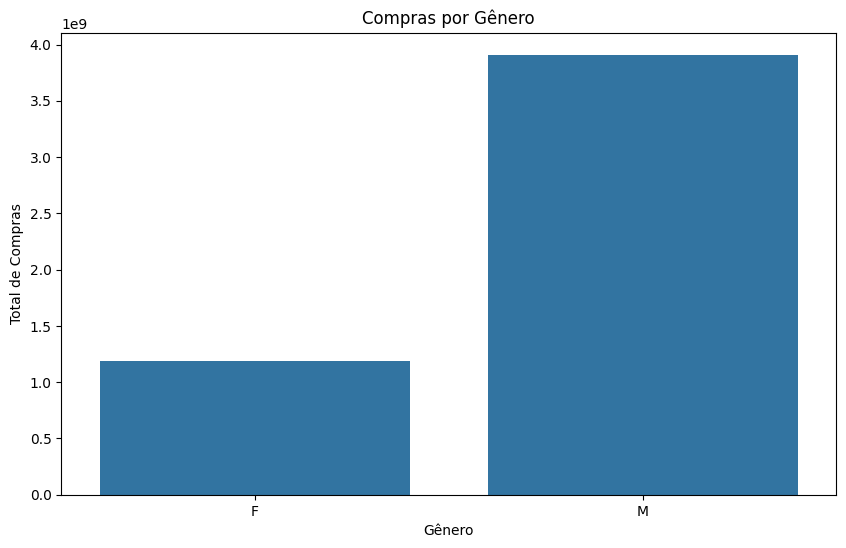

In [15]:
gender_purchase = df.groupby('Gender')['Purchase'].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=gender_purchase.index, y=gender_purchase.values)
plt.title('Compras por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Total de Compras')
plt.show()

#### Análise por estado civil
- Este código realiza uma análise visual das compras em relação ao estado civil dos clientes. O eixo x representa os diferentes estados civis, onde 0 indica solteiro e 1 indica casado, enquanto o eixo y mostra o total de compras para cada grupo. Este gráfico proporciona uma rápida visualização das tendências de compra entre os diferentes estados civis dos clientes.


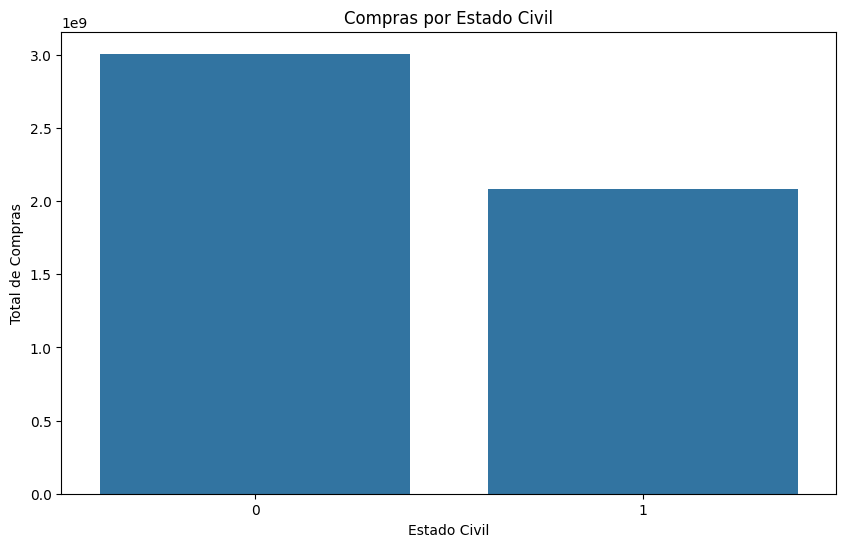

In [16]:
marital_status_purchase = df.groupby('Marital_Status')['Purchase'].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=marital_status_purchase.index, y=marital_status_purchase.values)
plt.title('Compras por Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Total de Compras')
plt.show()

#### Análise por Ocupação

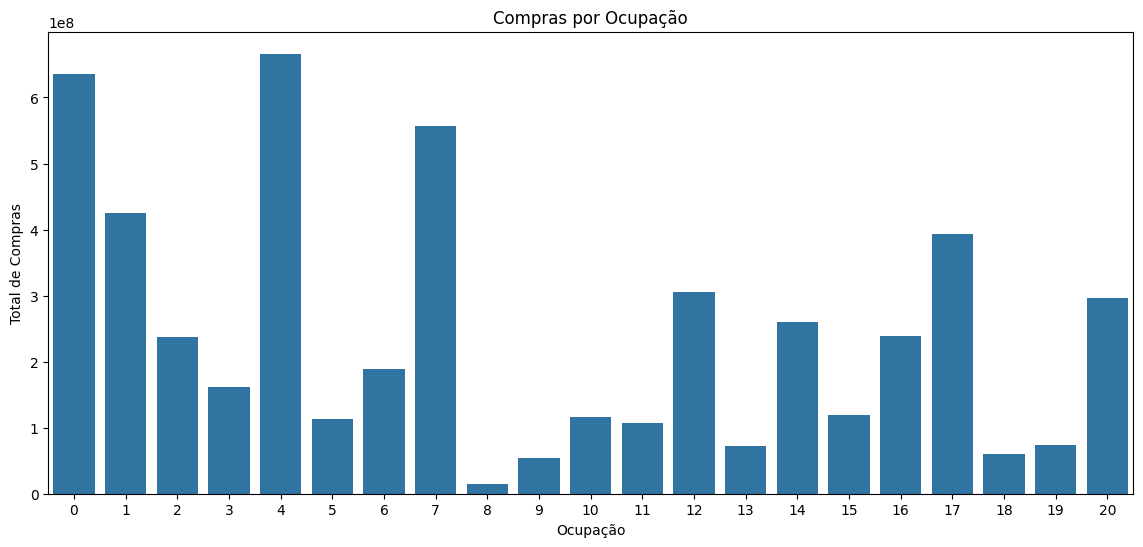

In [17]:
occupation_purchase = df.groupby('Occupation')['Purchase'].sum()

plt.figure(figsize=(14, 6))
sns.barplot(x=occupation_purchase.index, y=occupation_purchase.values)
plt.title('Compras por Ocupação')
plt.xlabel('Ocupação')
plt.ylabel('Total de Compras')
plt.show()

#### Análise de ocupação / compra


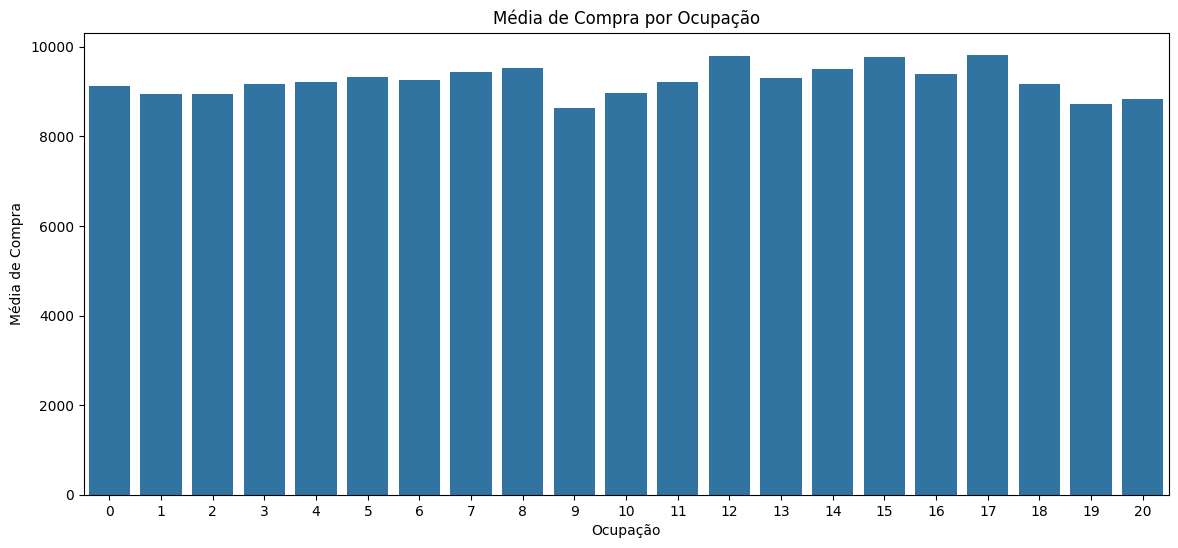

In [18]:
avg_purchase_by_occupation = df.groupby('Occupation')['Purchase'].mean()

plt.figure(figsize=(14, 6))
sns.barplot(x=avg_purchase_by_occupation.index, y=avg_purchase_by_occupation.values)
plt.title('Média de Compra por Ocupação')
plt.xlabel('Ocupação')
plt.ylabel('Média de Compra')
plt.show()

#### Análise de compra por cidade


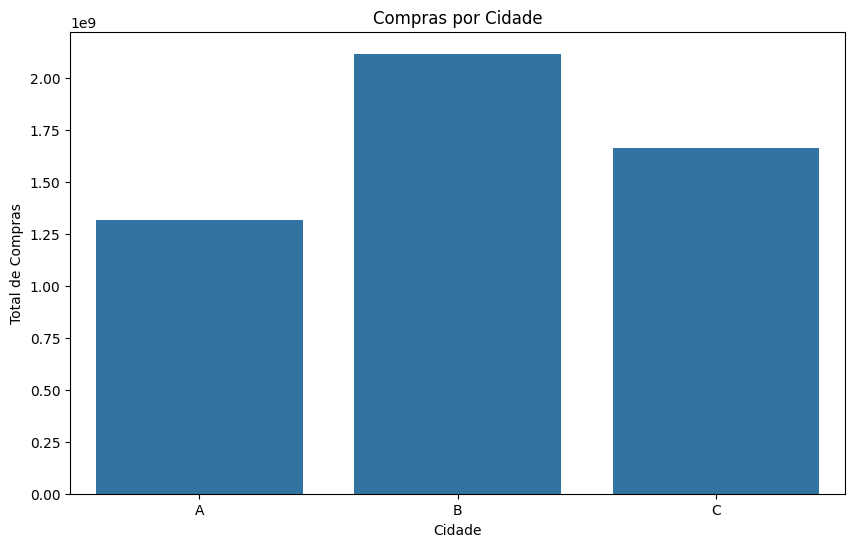

In [19]:
city_purchase = df.groupby('City_Category')['Purchase'].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=city_purchase.index, y=city_purchase.values)
plt.title('Compras por Cidade')
plt.xlabel('Cidade')
plt.ylabel('Total de Compras')
plt.show()

#### Análise de compra por faixa etária


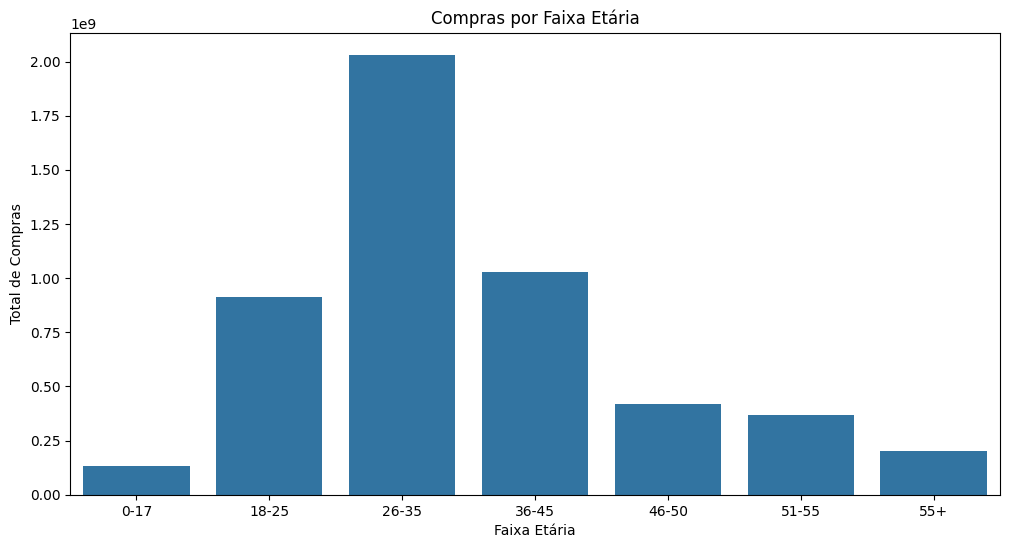

In [20]:
age_purchase = df.groupby('Age')['Purchase'].sum()

plt.figure(figsize=(12, 6))
sns.barplot(x=age_purchase.index, y=age_purchase.values)
plt.title('Compras por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Total de Compras')
plt.show()
